In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
snis = pd.read_excel('dados/indicadores-sanepar-20-21.xlsx')

In [3]:
snis = snis.drop(snis.index[-1])

In [4]:
snis

,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,...,IN076 - Incidência das análises de turbidez fora do padrão,IN077 - Duração média dos reparos de extravasamentos de esgotos,IN079 - Índice de conformidade da quantidade de amostras - cloro residual,IN080 - Índice de conformidade da quantidade de amostras - turbidez,IN082 - Extravasamentos de esgotos por extensão de rede,IN083 - Duração média dos serviços executados,IN084 - Incidência das análises de coliformes totais fora do padrão,IN085 - Índice de conformidade da quantidade de amostras - coliformes totais,IN101 - Índice de suficiência de caixa,IN102 - Índice de produtividade de pessoal total (equivalente)
0,410020,Adrianópolis,PR,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água,Sociedade de economia mista com administração ...,...,0.27,NaN,100.0,100.0,NaN,75.38,0.0,100.0,NaN,634.96
1,410020,Adrianópolis,PR,2020,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água,Sociedade de economia mista com administração ...,...,0.00,NaN,100.0,100.0,NaN,1.36,0.0,100.0,124.62,NaN
2,410030,Agudos do Sul,PR,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,...,0.00,NaN,100.0,100.0,0.00,44.63,0.0,100.0,87.59,454.33
3,410030,Agudos do Sul,PR,2020,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,...,0.00,NaN,100.0,100.0,0.00,0.76,0.0,100.0,103.66,449.80
4,410040,Almirante Tamandaré,PR,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,...,0.22,NaN,100.0,100.0,0.12,69.91,0.0,100.0,128.97,726.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,412850,Wenceslau Braz,PR,2020,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,...,0.00,NaN,100.0,100.0,0.02,1.07,0.0,100.0,127.70,613.08
686,412880,Xambrê,PR,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,...,0.00,NaN,100.0,100.0,0.00,70.40,0.0,100.0,139.74,620.57
687,412880,Xambrê,PR,2020,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,...,0.00,NaN,100.0,100.0,0.00,0.91,0.0,100.0,141.40,595.85
688,421360,Porto União,SC,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,...,0.00,NaN,100.0,100.0,0.00,67.91,0.0,100.0,241.41,NaN


In [5]:
#variáveis analisadas
filtro = [
    'Código do Município',    
    'Município',
    'Ano de Referência',
    'Prestador',
    'GE017 - Ano de vencimento da delegação de abastecimento de água',
    'POP_TOT - População total do município do ano de referência (Fonte: IBGE):',
    'AG001 - População total atendida com abastecimento de água',
    'Tipo de serviço',
    'AG026 - População urbana atendida com abastecimento de água',
    'AG002 - Quantidade de ligações ativas de água',
    'AG006 - Volume de água produzido',
    'AG011 - Volume de água faturado',
    'AG010 - Volume de água consumido',
    'QD002 - Quantidades de paralisações no sistema de distribuição de água',
    'IN076 - Incidência das análises de turbidez fora do padrão',
    'QD027 - Quantidade de amostras para coliformes totais com resultados fora do padrão',
    'IN079 - Índice de conformidade da quantidade de amostras - cloro residual',
    'ES001 - População total atendida com esgotamento sanitário',
    'ES002 - Quantidade de ligações ativas de esgotos',
    'ES005 - Volume de esgotos coletado',
    'ES007 - Volume de esgotos faturado',
    'ES006 - Volume de esgotos tratado',
    'ES004 - Extensão da rede de esgotos',
    ]

In [6]:
snis_filtrada = snis[filtro]

###  população total atendida com abastecimento de água

In [75]:
pop_atendida_agua = pd.crosstab([snis_filtrada['Código do Município'], snis_filtrada['Município']], snis_filtrada['Ano de Referência'], snis_filtrada['AG001 - População total atendida com abastecimento de água'], aggfunc='sum')
pop_atendida_agua['variação'] = round((pop_atendida_agua[2021] - pop_atendida_agua[2020]) *100 / pop_atendida_agua[2020], 2)

In [76]:
#Aumento percentual da população atendida com água
pop_atendida_agua.sort_values(by='variação', ascending=False)

,Ano de Referência,2020,2021,variação
Código do Município,Município,,,
410712,Diamante do Sul,1912,2070,8.26
412865,Virmond,2608,2810,7.75
411705,Nova Laranjeiras,2874,3072,6.89
411545,Marquinho,2106,2249,6.79
410865,Goioxim,2945,3142,6.69
...,...,...,...,...
410337,Brasilândia do Sul,2584,2520,-2.48
411220,Janiópolis,5094,4947,-2.89
411130,Itaúna do Sul,2780,2699,-2.91


In [9]:
pop_atendida_agua = pd.DataFrame(pop_atendida_agua.reset_index())

In [10]:
#Total de municípios que aumentaram e diminuiram a população atendida com água

pop_atendida_negativa = pop_atendida_agua[pop_atendida_agua['variação'] < 0]['variação'].count()
pop_atendida_positiva = pop_atendida_agua[pop_atendida_agua['variação'] > 0]['variação'].count()

print(f'Total de municípios que reduziram atendimento: {pop_atendida_negativa} ({pop_atendida_negativa * 100 / pop_atendida_agua.shape[0]:.2f}%)')
print(f'Total de municípios que aumentaram o atendimento: {pop_atendida_positiva} ({pop_atendida_positiva * 100 / pop_atendida_agua.shape[0]:.2f}%)')

Total de municípios que reduziram atendimento: 75 (21.74%)
Total de municípios que aumentaram o atendimento: 269 (77.97%)


In [11]:
import geobr

In [53]:
# All municipalities in the state of Alagoas
muni = geobr.read_municipality(code_muni="PR", year=2020)

In [72]:
muni['code_muni'] = muni['code_muni']/10
muni['code_muni'] = muni['code_muni'].values.astype(int)

In [77]:
#merge dfs

muni = muni.merge(pop_atendida_agua, how="left", left_on="code_muni", right_on='Código do Município')

In [106]:
pop_atendida_agua.sort_values(by='variação', ascending=False)

,Ano de Referência,2020,2021,variação
Código do Município,Município,,,
410712,Diamante do Sul,1912,2070,8.26
412865,Virmond,2608,2810,7.75
411705,Nova Laranjeiras,2874,3072,6.89
411545,Marquinho,2106,2249,6.79
410865,Goioxim,2945,3142,6.69
...,...,...,...,...
410337,Brasilândia do Sul,2584,2520,-2.48
411220,Janiópolis,5094,4947,-2.89
411130,Itaúna do Sul,2780,2699,-2.91


In [79]:
muni

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,2020,2021,variação
0,410010,Abatiá,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.22465 -23.22603, -50.22826...",NaN,NaN,NaN
1,410020,Adrianópolis,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-48.99969 -24.63712, -49.00061...",3981.0,4035.0,1.36
2,410030,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541...",5740.0,5993.0,4.41
3,410040,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277...",120028.0,121407.0,1.15
4,410045,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153...",1681.0,1428.0,-15.05
...,...,...,...,...,...,...,...,...,...,...,...
394,412862,Alto Paraíso,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.75199 -23.37324, -53.74475...",2684.0,2629.0,-2.05
395,412863,Doutor Ulysses,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.25710 -24.42878, -49.25259...",NaN,NaN,NaN
396,412865,Virmond,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.22111 -25.26374, -52.21895...",2608.0,2810.0,7.75
397,412870,Vitorino,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.82010 -26.15020, -52.81527...",6858.0,6878.0,0.29


In [94]:
muni['variação'].dropna().shape

(344,)

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.949713980750005,
 -47.69371950425,
 -26.926002461750002,
 -22.330632435250013)

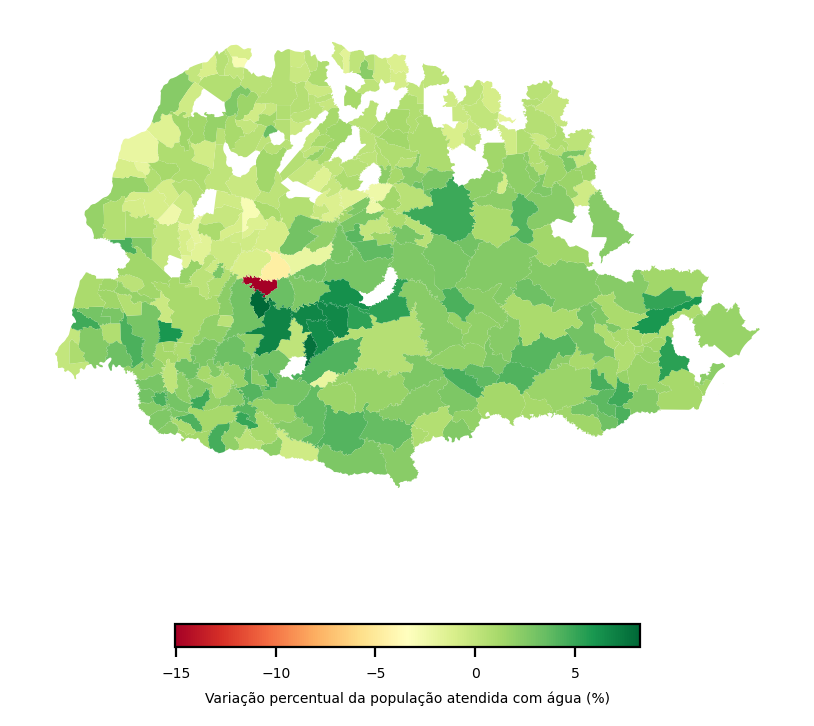

In [102]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
muni.plot(
    column="variação",
    cmap="RdYlGn",
    legend=True,
    legend_kwds={
        "label": "Variação percentual da população atendida com água (%)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

#ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")